# Gradient Boosting vs XGBoost

In this notebook, we compare two popular gradient boosting implementations:
- `GradientBoostingRegressor` / `GradientBoostingClassifier` from Scikit-learn
- `XGBRegressor` / `XGBClassifier` from XGBoost

We'll compare them on:
- Accuracy / RMSE
- Overfitting tendency
- Training time
- Feature importance
- Effect of hyperparameters (learning_rate, n_estimators, max_depth)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Regression

In [12]:
# Generate synthetic regression data
X, y = make_regression(n_samples=2000, n_features=10, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgbr = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42, n_jobs=-1)

# Training and timing
start = time.time(); gbr.fit(X_train, y_train); gbr_time = time.time() - start
start = time.time(); xgbr.fit(X_train, y_train); xgbr_time = time.time() - start

# Predictions
y_pred_gbr = gbr.predict(X_test)
y_pred_xgbr = xgbr.predict(X_test)

# Evaluation
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
rmse_xgbr = mean_squared_error(y_test, y_pred_xgbr, squared=False)

print(f"GradientBoosting RMSE: {rmse_gbr:.3f} (time: {gbr_time:.2f}s)\n")
print(f"XGBoost RMSE: {rmse_xgbr:.3f} (time: {xgbr_time:.2f}s)")

GradientBoosting RMSE: 34.590 (time: 1.54s)

XGBoost RMSE: 36.559 (time: 0.11s)


# Classification

In [13]:
# Generate synthetic classification data
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgbc = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42, n_jobs=-1)

# Train
start = time.time(); gbc.fit(X_train, y_train); gbc_time = time.time() - start
start = time.time(); xgbc.fit(X_train, y_train); xgbc_time = time.time() - start

# Predict
y_pred_gbc = gbc.predict(X_test)
y_pred_xgbc = xgbc.predict(X_test)

# Accuracy
acc_gbc = accuracy_score(y_test, y_pred_gbc)
acc_xgbc = accuracy_score(y_test, y_pred_xgbc)

print(f"GradientBoosting Accuracy: {acc_gbc:.3f} (time: {gbc_time:.2f}s)\n")
print(f"XGBoost Accuracy: {acc_xgbc:.3f} (time: {xgbc_time:.2f}s)")


GradientBoosting Accuracy: 0.915 (time: 1.63s)

XGBoost Accuracy: 0.922 (time: 0.11s)


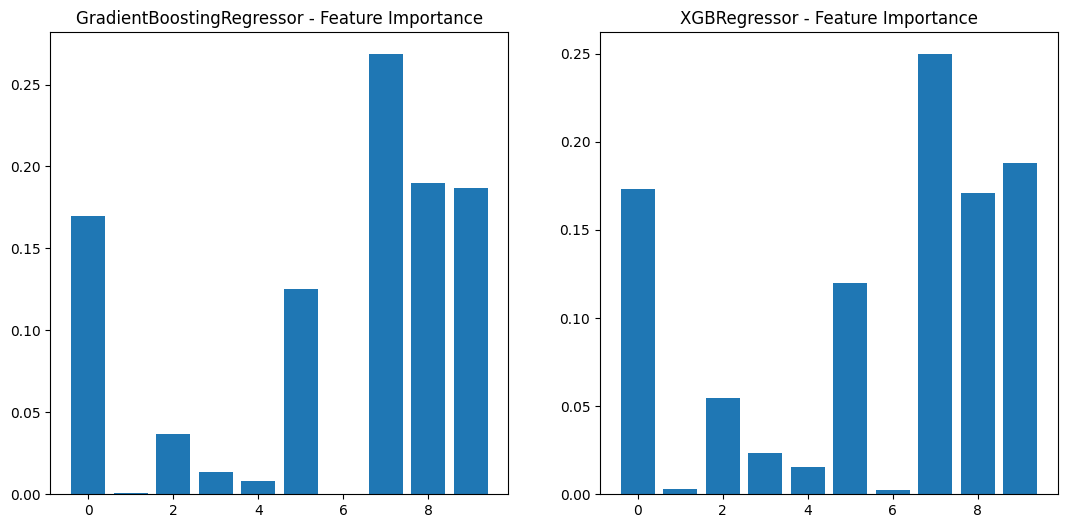

In [14]:
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]), gbr.feature_importances_)
plt.title("GradientBoostingRegressor - Feature Importance")

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]), xgbr.feature_importances_)
plt.title("XGBRegressor - Feature Importance")
plt.show()

**XGBoost** generally outperforms classical Gradient Boosting in speed and often in accuracy, while offering better regularization and GPU support.